# Ensemble Methods

* Bagging - linear/logistic, svm and knn
* Busting - sequential models
* Stacking
* Cascading

* Bagging

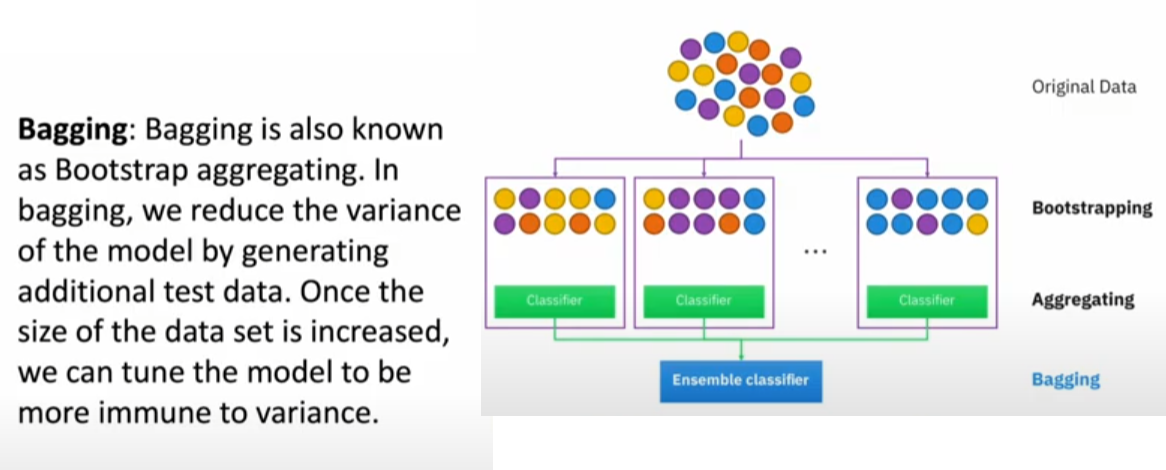

* IN BAGGING DATA PARTITION IS RANDOM

* THE GOAL IS TO REDUCE VARIANCE IN THE MODEL

* IT USES RANDOM SUBSPACE FOR BAGGING AND IT ALSO USES WEIGHTED OR AVERAGE FUNCTION

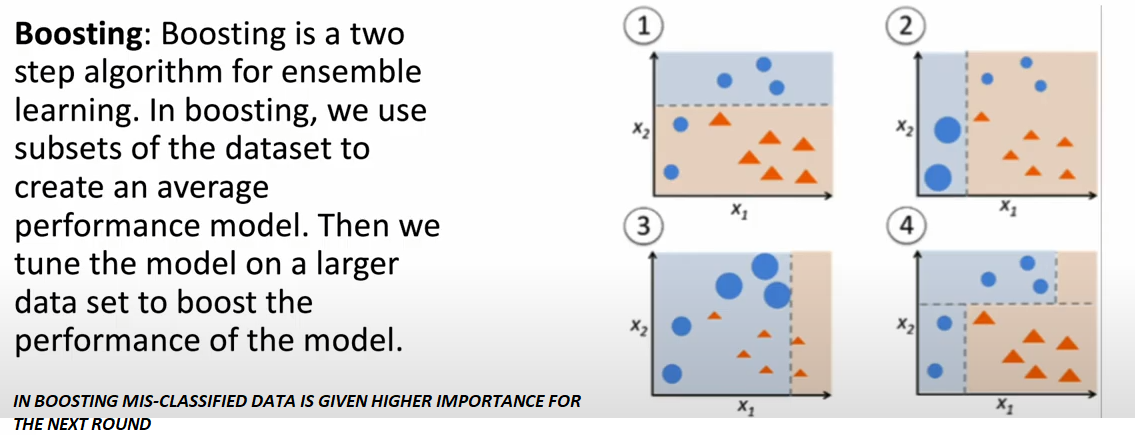

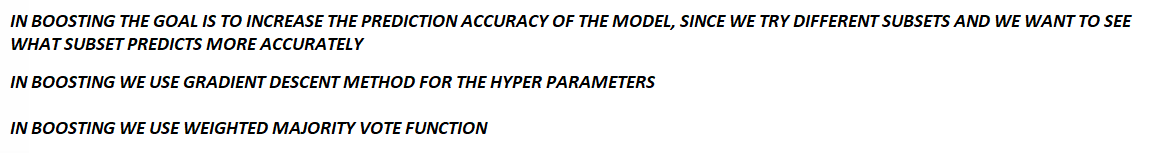

In [1]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [42]:
#2 Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/mk-gurucharan/Regression/master/IceCreamData.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 1].values
print(X.shape, y.shape)

(500, 1) (500,)


In [43]:
#3 Fitting the Decision Tree Regression Model to the dataset


# Create the Decision Tree regressor object here
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
print(x_train.shape, x_test.shape)

(350, 1) (150, 1)


In [44]:
x_train[:10]

array([[740.9356848],
       [905.4776043],
       [353.3256334],
       [337.1190252],
       [809.3525195],
       [603.2329422],
       [550.2785159],
       [774.1080813],
       [633.5040087],
       [437.2519927]])

In [45]:
y_train[:10]

array([740.9356848, 905.4776043, 353.3256334, 337.1190252, 809.3525195,
       603.2329422, 550.2785159, 774.1080813, 633.5040087, 437.2519927])

In [46]:
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor = DecisionTreeRegressor(random_state=0)
#Fit the regressor object to the dataset.
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [47]:
#4 Predicting a new result
y_pred = regressor.predict(np.array(5.5).reshape(1,-1))    # scalar into 2d array
y_pred

array([10.])

In [48]:
dataset.sort_values(['Temperature'], ascending=True).head(20)

,Temperature,Revenue
402,0.000000,10.000000
371,0.267028,32.546619
8,0.976870,55.390338
11,3.664670,71.160153
63,3.986523,131.657017
229,4.236465,118.812150
484,4.865874,188.151331
405,5.307507,242.509855
267,5.338413,145.625302
204,5.822332,186.476487


In [49]:
y_pred = regressor.predict(x_test)
y_pred

array([384.6994155, 596.8891052, 356.0980075, 303.7343815, 212.4835594,
       473.6043349, 425.2655958, 643.6486011, 537.7661123, 409.4938476,
       493.7103332, 689.930778 , 543.5995933, 413.9140669, 691.8554843,
       507.900282 , 374.231135 , 257.078777 , 572.6720474, 586.150568 ,
       441.5087331, 623.5988607, 458.860905 , 379.318226 , 343.3629045,
       704.2814391, 563.3012801, 526.7008607, 680.0271205, 517.5340283,
       612.1539491, 644.4886327, 278.0627594, 627.6508336, 418.1372788,
       250.1317278, 554.7429738, 319.4029032, 483.3330784, 496.0119175,
       413.9140669, 401.9247923, 774.1080813, 654.8949545, 892.9477198,
       607.5421478, 319.4029032, 477.3151879, 702.6236136, 818.135393 ,
       321.8482734, 319.4029032, 627.6508336, 242.2362083, 661.4675188,
       158.8498064, 295.3396989, 570.5778753, 535.7089203, 441.5087331,
       612.1539491, 731.5982226, 308.8945179, 493.2266364, 570.9909316,
       572.0812915, 242.2362083, 489.3152348, 689.930778 , 969.2

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



In [51]:
mean_squared_error(y_test, y_pred)

9.208268501346247

### HYPER PARAMETER TUNNING

In [60]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# 'criterion': ['squared_error', 'friedmasquared_errorn_mse', 'absolute_error', 'poisson'],

grid_param = {
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']}

In [61]:
grid_param

{'max_depth': range(2, 32),
 'min_samples_leaf': range(1, 10),
 'min_samples_split': range(2, 10),
 'splitter': ['best', 'random']}

In [62]:
# GRID SEARCH
grid_search = GridSearchCV(DecisionTreeRegressor(),
                         param_grid=grid_param,
                         cv=5,
                         n_jobs =-1)

In [63]:
grid_search.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [64]:
best_parameters = grid_search.best_params_
best_parameters

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [65]:
#DecisionTreeRegressor class has many parameters. Input only #random_state=0 or 42.
regressor1 = DecisionTreeRegressor(max_depth= 11, min_samples_leaf= 1,min_samples_split= 2,splitter= 'best')

#Fit the regressor object to the dataset.
regressor1.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=11)

In [66]:
y_pred1 = regressor1.predict(x_test)
y_pred1

array([384.6994155, 596.8891052, 356.0980075, 303.7343815, 212.4835594,
       473.6043349, 425.2655958, 643.6486011, 537.7661123, 409.4938476,
       493.7103332, 689.930778 , 543.5995933, 413.9140669, 691.8554843,
       507.900282 , 374.231135 , 257.078777 , 572.6720474, 586.150568 ,
       441.5087331, 623.5988607, 458.860905 , 379.318226 , 343.3629045,
       704.2814391, 563.3012801, 526.7008607, 680.0271205, 517.5340283,
       612.1539491, 644.4886327, 278.0627594, 627.6508336, 418.1372788,
       250.1317278, 554.7429738, 319.4029032, 483.3330784, 496.0119175,
       413.9140669, 401.9247923, 774.1080813, 654.8949545, 892.9477198,
       607.5421478, 319.4029032, 477.3151879, 702.6236136, 818.135393 ,
       321.8482734, 319.4029032, 627.6508336, 242.2362083, 661.4675188,
       158.8498064, 295.3396989, 570.5778753, 535.7089203, 441.5087331,
       612.1539491, 731.5982226, 308.8945179, 493.2266364, 570.9909316,
       572.0812915, 242.2362083, 489.3152348, 689.930778 , 969.2

In [67]:
mean_squared_error(y_test, y_pred1)

9.208268501346247

In [69]:
print(regressor1.score(x_train,y_train))   # potential overfitting due to the size of the dataset

0.9999999995898867


In [72]:
#4 Predicting a new result
print(regressor.predict(np.array(25).reshape(1,-1)))    # scalar into 2d array
print(regressor1.predict(np.array(25).reshape(1,-1)))

[32.54661902]
[32.54661902]


In [74]:
### https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

from sklearn.ensemble import RandomForestRegressor

rfs_reg = RandomForestRegressor()
rfs_reg.fit(x_train,y_train)

RandomForestRegressor()

In [75]:
y_pred2 = rfs_reg.predict(x_test)
y_pred2

array([384.72461378, 596.89086492, 357.42262629, 304.79195805,
       214.30196369, 473.52010691, 425.7381686 , 643.69031259,
       537.67329131, 409.63102037, 494.51157101, 690.58921746,
       543.34124596, 412.43114053, 691.97914201, 507.36440697,
       374.99208158, 256.45104524, 572.47652078, 586.09924085,
       441.57856015, 624.65628964, 460.16239109, 379.90762704,
       343.32728718, 704.55545379, 564.01506103, 526.20146575,
       679.79440195, 517.7361923 , 612.15595382, 646.10267818,
       277.53205191, 627.24919377, 417.37556376, 249.37599298,
       554.30839056, 320.39201273, 483.6594229 , 496.29785065,
       412.43114053, 402.14148075, 776.56707563, 654.66464548,
       896.03776276, 608.01982826, 318.86576804, 477.23746604,
       702.09708249, 820.61609342, 322.10484585, 320.24151119,
       627.58023684, 243.08462707, 661.93935502, 153.64446578,
       294.36311612, 570.94855692, 535.37811504, 441.57856015,
       612.15595382, 734.93144783, 306.75280989, 493.20

In [76]:
print(rfs_reg.predict(np.array(25).reshape(1,-1)))

[31.87223221]


In [77]:
mean_squared_error(y_test, y_pred2)

15.669088613266437

In [82]:
# HYPER PARAMETER FOR RANDOM FOREST REGRESSOR
grid_param = {
    'n_estimators':[100,200,300,400],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1)}

In [83]:
grid_param

{'n_estimators': [100, 200, 300, 400],
 'max_depth': range(2, 32),
 'min_samples_leaf': range(1, 10),
 'min_samples_split': range(2, 10)}

In [84]:
# GRID SEARCH
grid_search = GridSearchCV(RandomForestRegressor(),
                         param_grid=grid_param,
                         cv=5,
                         n_jobs =-1)

In [85]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'n_estimators': [100, 200, 300, 400]})

In [86]:
best_parameters = grid_search.best_params_
best_parameters

{'max_depth': 27,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [87]:
y_pred3 = grid_search.predict(x_test)
y_pred3

array([384.53462653, 596.77257764, 356.97492243, 304.21715481,
       214.16767965, 473.56799098, 426.19642309, 643.66997453,
       537.6807809 , 409.73265742, 494.43801088, 690.83078709,
       543.20839556, 412.31095197, 691.82366468, 507.48822053,
       374.95410226, 257.07065463, 572.44525957, 585.95429126,
       441.57495488, 624.60657797, 460.1395809 , 379.79130674,
       343.52942622, 704.51535911, 563.77610593, 526.40043693,
       679.80398719, 517.79502184, 612.03872807, 645.73605836,
       277.16728891, 627.13350309, 416.90468924, 249.50466272,
       554.37400433, 320.37226955, 483.61375494, 496.42740589,
       412.31095197, 402.23868566, 776.04160445, 654.76413859,
       893.97708886, 607.99853334, 319.40747309, 477.34570505,
       702.31614462, 820.57270985, 322.15364867, 320.37226955,
       627.6067413 , 243.35296493, 661.54442571, 150.64660331,
       294.61173783, 570.89372959, 535.48063607, 441.65370979,
       612.03872807, 734.35022472, 306.28120938, 493.25

In [88]:
mean_squared_error(y_test, y_pred3)

16.14274447350239

In [89]:
print(grid_search.predict(np.array(25).reshape(1,-1)))

[32.75399687]


In [90]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [91]:
dataset = load_breast_cancer()
X=dataset.data
y=dataset.target

In [94]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [95]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [97]:
clf_svc = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0)
clf_svc.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), random_state=0)

In [98]:
clf_knn = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=0)
clf_knn.fit(X_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), random_state=0)

In [99]:
clf_lr = BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=10, random_state=0)
clf_lr.fit(X_train,y_train)

C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\rivil\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/mo

BaggingClassifier(base_estimator=LogisticRegression(), random_state=0)

In [100]:
clf_dt = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
clf_dt.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=0)

In [101]:
clf_rf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=0)
clf_rf.fit(X_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), random_state=0)

In [102]:
print(f"clf_svc:{clf_svc.score(X_test,y_test)}")
print(f"clf_knn:{clf_knn.score(X_test,y_test)}")    
print(f"clf_lr:{clf_lr.score(X_test,y_test)}")
print(f"clf_dt:{clf_dt.score(X_test,y_test)}")
print(f"clf_rf:{clf_rf.score(X_test,y_test)}")   

clf_svc:0.9370629370629371
clf_knn:0.9300699300699301
clf_lr:0.9440559440559441
clf_dt:0.972027972027972
clf_rf:0.965034965034965


# TASK
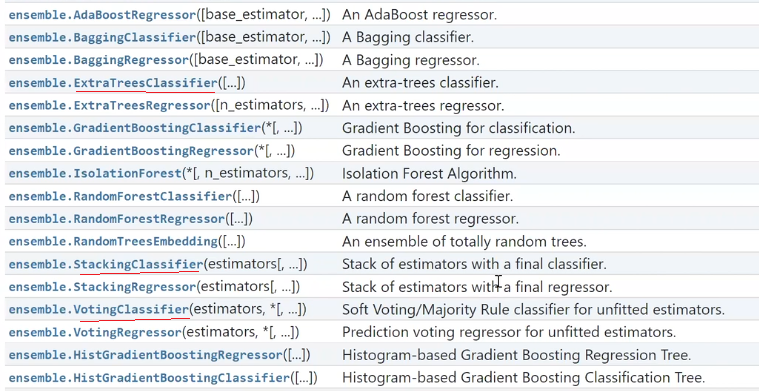

In [ ]:
#5 Visualising the Decision Tree Regression results
plt.figure(figsize=(25,30))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('Check It (Regression Model)')
plt.xlabel('')
plt.ylabel('')
plt.show()


In [ ]:
#6 Visualising the Regression results (for higher resolution and smoother curve)
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Example of Decision Regression Model')
plt.xlabel('')
plt.ylabel('')
plt.show()

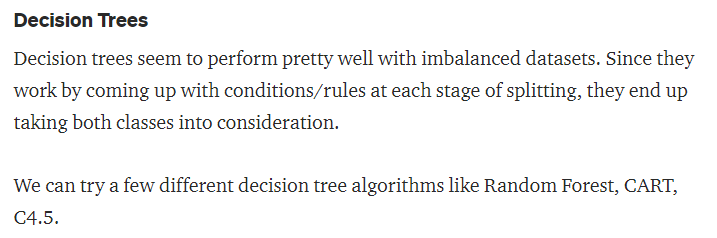

##  Are tree based models sensitive to outliers?

Tree-based models are generally not as affected by outliers, while regression-based models are.

## How do we deal with outliers before building a decision tree?

There are two main approaches to solve this problem: either remove the outliers or build your own decision tree algorithm that makes splits based on the median instead of the average, as the median is not affected by outliers.

## Do outliers affect random forest?

Also, output outliers will affect the estimate of the leaf node they are in, but not the values of any other leaf node. … So output outliers have a “quarantined” effect. Thus, outliers that would wildly distort the accuracy of some algorithms have less of an effect on the prediction of a Random Forest.

## How do decision trees treat outliers?
Decision Tree handles the outliers automatically, hence they are usually robust to outliers. 

## Less Training Period: 

The training period of decision trees is less as compared to ensemble techniques like Random Forest because it generates only one Tree unlike the forest of trees in the Random Forest.

## Can decision trees handle missing data?

Decision trees are a popular family of models due to their attractive properties such as interpretability and ability to handle heterogeneous data. … As such, handling missing data in decision trees is a well studied problem.

# TASK

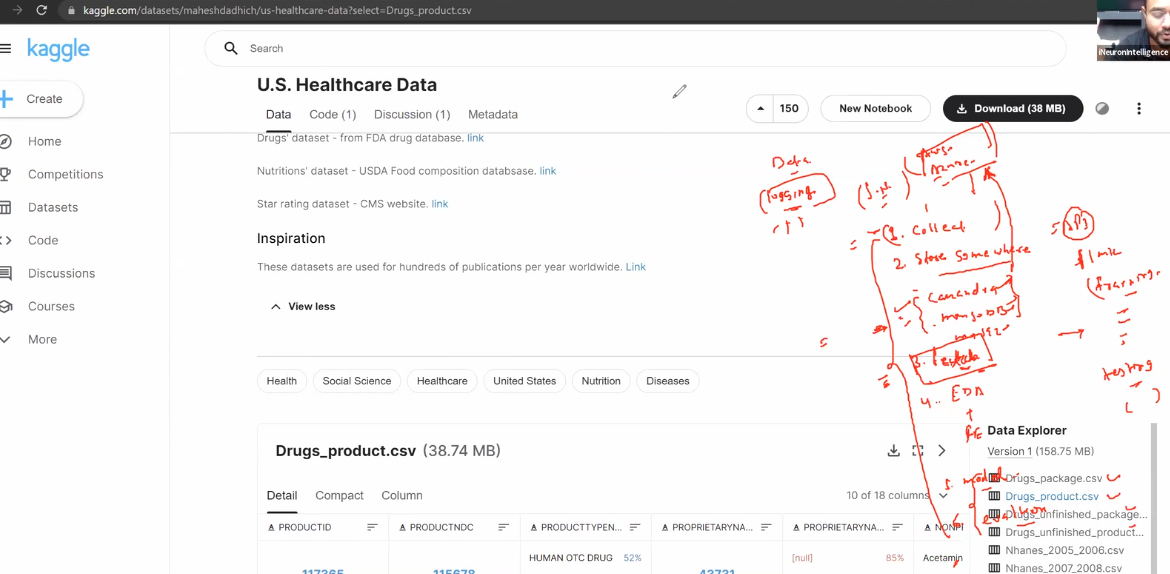

# STACKING ENSEMBLE

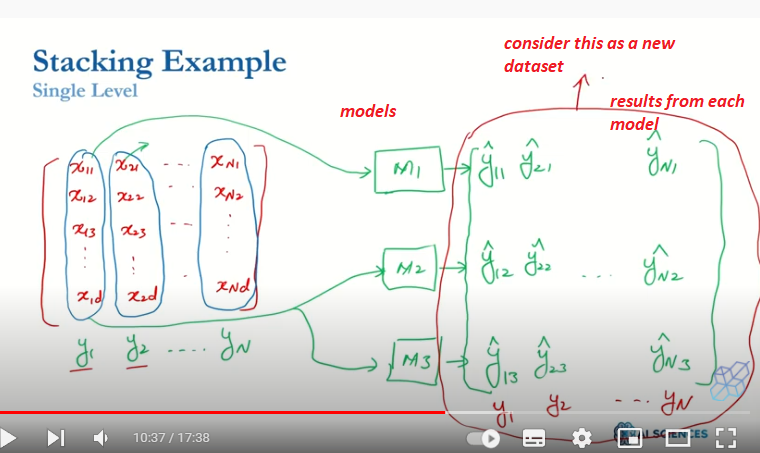

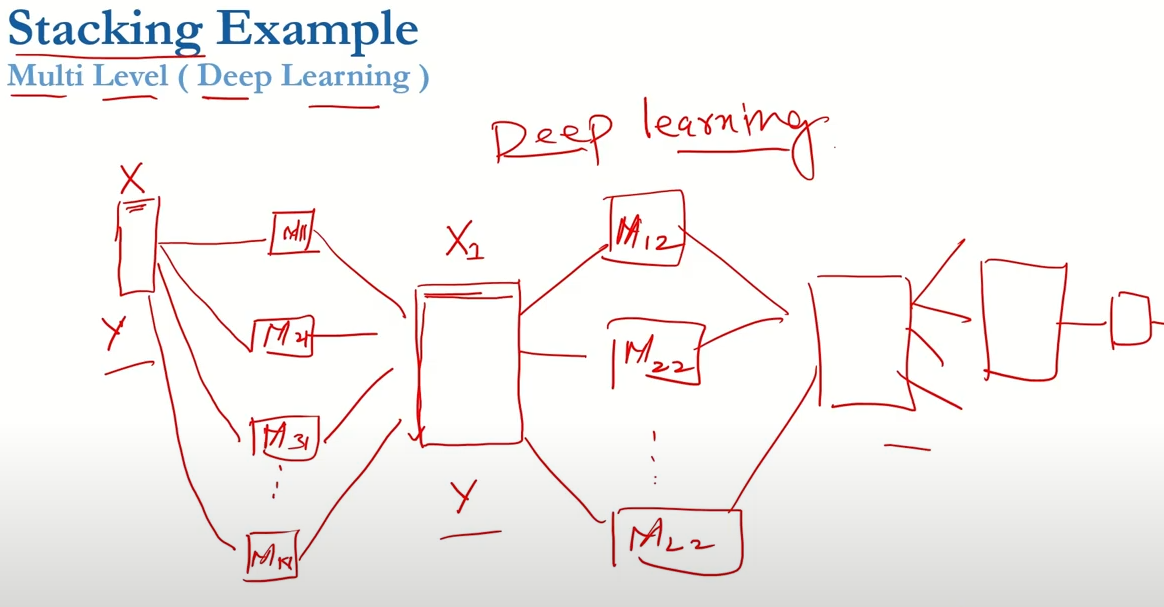

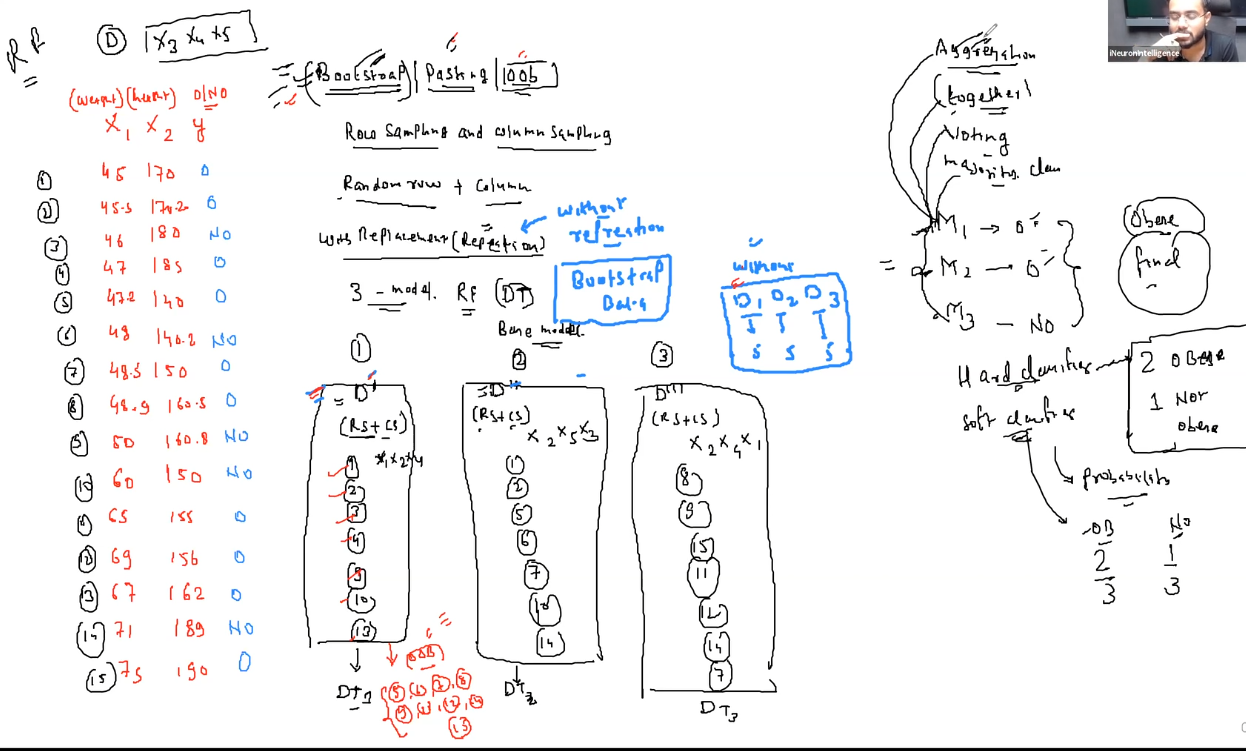

### EXTRA TREE CLASSIFIER

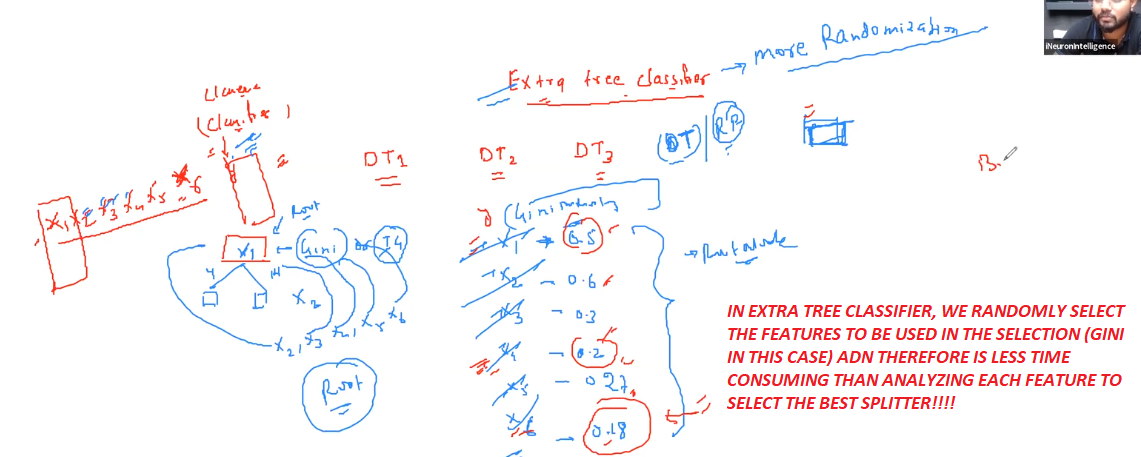